In [257]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import itertools
import numpy as np
import random
import re
from collections import Counter

%matplotlib inline

In [262]:
POSITIVE = ['(^_^)', '(^o^)', '(^^)', '(^-^)', '（●＾o＾●）', '（＾◇＾）', '(*^_^*)', '(*´ｰ`)', '(*´∀｀*)', '(*´ω｀*)', '(*´艸｀*)', '(/ω＼)', '(^_^)V', '(^o^)V', 'ヽ(=´▽`=)ﾉ', 'o(^o^)o', '＼(^_^ )( ^_^)／', 'σ(^_^)', 'σ(´∀｀)', '!(^^)!', '(^^ゞ', '(^Q^)/', '(^^ゝ', '(^人^)', '(^_-)-☆', '(^з^)-☆', '(￣ー￣)ｂ', 'p(^^)q', '(-o-)y-~~~', '(^_^)y-~~~', 'φ(^o^)', '( ^_^)／□☆□＼(^_^ )', '( ^_^)／ o(^o^)o ＼(^_^ )', '(／＼) ＼(^o^)／', '(^_^)/~~~']
NEGATIVE = ['(# ﾟДﾟ)', '(゜_゜)', '(`_`)ノ゛', '(^-^;', '(-_-;)', '(=_=;)', '(ﾉ´Д`)', '(-o-;)', '(^^;)', '(^_^;)', '(^o^;)', '...(((;^^)', '(+_+)', '(o-_-o)', 'ヽ(#ﾟДﾟ)ﾉ', '(-_-メ)', '(ーー゛)', '(-’’-)', '(｀´）', 'ヽ(#｀Д´#)ﾉ', '(￣へ￣井)', '(-ε´-。)', '(￣д￣)', '( ´Д｀)', '(ﾉ´□｀)ﾉ', 'ヽ(*´Д｀*)ﾉ', '┐(´～`；)┌', '(#´Д｀#)', '(*_*)', '( -_-)', '｜(-_-)｜', '(;_;)', '(T_T)', '(/_;)', '(ﾉдヽ)', '(TдT)', '(ﾉ´□｀)', 'ヽ(;´Д`)ノ', '(ｏ´_｀ｏ)', 'm(_ _)m', '＼(__ )', '(>_<)', '(+д+)', '（￣□￣；）', '(lll￣□￣)', '(@_@)', '(＠_＠;)']

In [263]:
# Create data frame for smileys
smiley_df = pd.DataFrame.from_records(
    [[x, 'positive'] for x in POSITIVE] + [[x, 'negative'] for x in NEGATIVE],
    columns=['keyword', 'sentiment'])
smiley_df = smiley_df.drop_duplicates()

In [282]:
MIN_TEXT_LENGTH = 80

# Load the data
data = pd.read_csv('../data/data.csv', names=['keyword', 'text'])
# Preprocessing: Remove hashtags, URLs and user mentions
data.text = data.text.str.replace('#\S+', '<HASHTAG> ', case=False)
data.text = data.text.str.replace('https?://\S+', '<URL> ', case=False)
data.text = data.text.str.replace('@\S+', '<USER> ', case=False)
# Only consider tweets of certain length
data = data[data['text'].map(lambda x: len(x) > MIN_TEXT_LENGTH)]
# Remove all smileys
for smiley in POSITIVE + NEGATIVE:
    data.text = data.text.str.replace(re.escape(smiley), '<SMILEY> ', case=False)
# Join data with positive/negative sentiment
data = pd.merge(data, smiley_df, on='keyword')
data = data.drop_duplicates()
data = data[['keyword', 'sentiment', 'text']]

In [283]:
data.describe()

,keyword,sentiment,text
count,601,601,601
unique,28,2,601
top,(^o^),positive,┗<SMILEY> ┛イタ電するぞぉぉぉｗｗ( ^o^)☎┐もしもしｗｗｗｗｗｗｗｗ <US...
freq,186,483,1


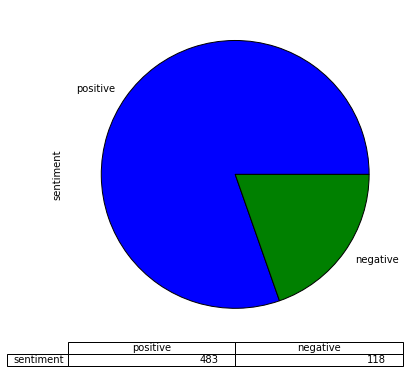

In [284]:
data.sentiment.value_counts().plot(kind='pie', figsize=(6,6), table=True)

In [285]:
# Subsample values from each smiley for manual checking
K = 10
filtered_data = data.groupby('keyword').filter(lambda x: len(x) > K)
indices = itertools.chain(*[np.random.choice(v, K, replace=False) for k, v in  filtered_data.groupby('keyword').groups.items()])
subsampled_data = data.reindex(indices)

In [286]:
subsampled_data.describe()

,keyword,sentiment,text
count,110,110,110
unique,11,2,110
top,(^-^),positive,【ちぃ汰】 夜もすがら君想ふ 【元気に踊ってみた】 (4:02) <URL> <HASHT...
freq,10,70,1


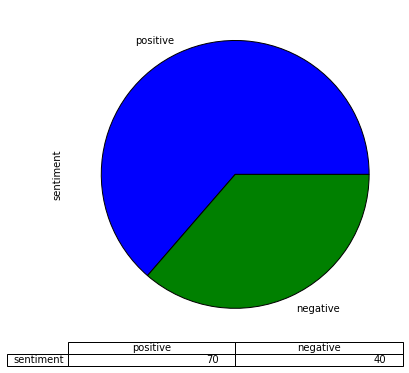

In [287]:
# Show positive vs. negative smiley distribution
subsampled_data.sentiment.value_counts().plot(kind='pie', figsize=(6,6), table=True)

In [288]:
# Write to csv file
subsampled_data.to_csv("../data/samples.csv")